Logistic Regression

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
%matplotlib inline

In [184]:
df = pd.read_csv('ex2data1.txt', names = ["exam1", "exam2", "admitted"])
df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [185]:
score_admitted = df.loc[df['admitted']==1,['exam1','exam2']]
score_dropped = df.loc[df['admitted']==0,['exam1','exam2']]


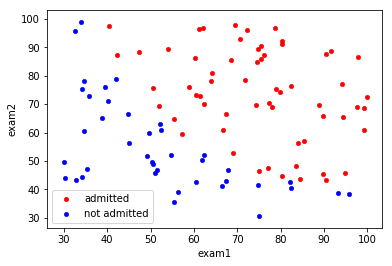

In [186]:
ax = score_admitted.plot(x='exam1', y='exam2', kind='scatter', marker='o', c='red', lw=0.5, label='admitted')
ax.set_xlabel("Exam1")
ax.set_ylabel("Exam2")
score_dropped.plot(x='exam1', y='exam2', kind='scatter', marker='o', c='blue', lw=0.5, label='not admitted', ax=ax)


In [187]:
def Sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [188]:
Sigmoid(1)

0.7310585786300049

In [189]:
df.insert(0, column='x0', value=1.0)

In [190]:
df.head()

,x0,exam1,exam2,admitted
0,1.0,34.623660,78.024693,0
1,1.0,30.286711,43.894998,0
2,1.0,35.847409,72.902198,0
3,1.0,60.182599,86.308552,1
4,1.0,79.032736,75.344376,1


In [191]:
X = np.array(df.iloc[:,:3]).T
y = np.array(df.iloc[:,3])

In [192]:
theta = np.zeros(3)
theta0 = theta

In [193]:
X.shape, theta.shape, y.shape

((3, 100), (3,), (100,))

In [194]:
num_iters= 1000
alpha = 0.00005

In [195]:
def Computecost(X, y, theta):
    cost = 0.0
    m = len(y)
    error = theta.T@X-y
    cost = np.sum(error**2)/(2*m)
    return cost

In [196]:
def ComputecostLogistic(X, y, theta):
    m = len(y)
    h = Sigmoid(theta.T@X)
    cost_term = -1*y*np.log(h)-(1-y)*np.log(1-h)
    return np.sum(cost_term/m)

In [197]:
J = ComputecostLogistic(X, y, theta)

In [198]:
J

0.6931471805599457

In [199]:
def gradientDescent(X, y, theta, alpha):
    m = len(y)
    term = (theta.T @ X - y) * X
    theta_new = theta - alpha/m*np.sum(term, axis=1)
    return theta_new

In [200]:
def gradientDescentLogistic(X, y, theta, alpha):
    m = len(y)
    term = (Sigmoid(theta.T @ X) - y) * X
    theta_new = theta - alpha/m*np.sum(term, axis=1)
    return theta_new

In [201]:
gradientDescentLogistic(X,y,theta,alpha)

array([5.00000000e-06, 6.00460829e-04, 5.63142110e-04])

In [202]:
J_hist = np.zeros(num_iters)

for num in range(0, num_iters):
    theta_new = gradientDescentLogistic(X, y, theta, alpha)
    J = ComputecostLogistic(X, y, theta_new)
    theta = theta_new
    print("Iter:", num, " Cost:", J)
    J_hist[num] = J

print("theta=",theta)

Iter: 0  Cost: 0.6803581745896343
Iter: 1  Cost: 0.6702911793292021
Iter: 2  Cost: 0.6623586103739
Iter: 3  Cost: 0.6560980970841296
Iter: 4  Cost: 0.6511477729696316
Iter: 5  Cost: 0.647225217058511
Iter: 6  Cost: 0.6441102135477978
Iter: 7  Cost: 0.6416309856357685
Iter: 8  Cost: 0.6396533733844779
Iter: 9  Cost: 0.6380724061386119
Iter: 10  Cost: 0.6368057747621249
Iter: 11  Cost: 0.6357887883761715
Iter: 12  Cost: 0.6349704805329832
Iter: 13  Cost: 0.6343106008684987
Iter: 14  Cost: 0.6337772872845856
Iter: 15  Cost: 0.6333452608925063
Iter: 16  Cost: 0.6329944228434048
Iter: 17  Cost: 0.6327087606348802
Iter: 18  Cost: 0.6324754932669362
Iter: 19  Cost: 0.6322844012204982
Iter: 20  Cost: 0.6321272998571441
Iter: 21  Cost: 0.6319976244394988
Iter: 22  Cost: 0.6318901022798394
Iter: 23  Cost: 0.6318004930975545
Iter: 24  Cost: 0.6317253829263122
Iter: 25  Cost: 0.6316620201774756
Iter: 26  Cost: 0.631608184977191
Iter: 27  Cost: 0.6315620848312314
Iter: 28  Cost: 0.6315222711702231


Iter: 353  Cost: 0.6298506908483733
Iter: 354  Cost: 0.6298495188189382
Iter: 355  Cost: 0.6298483542373172
Iter: 356  Cost: 0.6298471970436418
Iter: 357  Cost: 0.6298460471785262
Iter: 358  Cost: 0.6298449045830624
Iter: 359  Cost: 0.6298437691988182
Iter: 360  Cost: 0.6298426409678318
Iter: 361  Cost: 0.6298415198326084
Iter: 362  Cost: 0.6298404057361168
Iter: 363  Cost: 0.6298392986217847
Iter: 364  Cost: 0.6298381984334965
Iter: 365  Cost: 0.6298371051155882
Iter: 366  Cost: 0.629836018612845
Iter: 367  Cost: 0.6298349388704957
Iter: 368  Cost: 0.6298338658342121
Iter: 369  Cost: 0.6298327994501018
Iter: 370  Cost: 0.6298317396647084
Iter: 371  Cost: 0.6298306864250051
Iter: 372  Cost: 0.6298296396783922
Iter: 373  Cost: 0.6298285993726948
Iter: 374  Cost: 0.6298275654561569
Iter: 375  Cost: 0.6298265378774409
Iter: 376  Cost: 0.6298255165856214
Iter: 377  Cost: 0.629824501530184
Iter: 378  Cost: 0.6298234926610209
Iter: 379  Cost: 0.6298224899284282
Iter: 380  Cost: 0.62982149328

Iter: 699  Cost: 0.629657693087623
Iter: 700  Cost: 0.6296573919133738
Iter: 701  Cost: 0.6296570911990597
Iter: 702  Cost: 0.6296567909410019
Iter: 703  Cost: 0.6296564911355518
Iter: 704  Cost: 0.6296561917790892
Iter: 705  Cost: 0.6296558928680231
Iter: 706  Cost: 0.6296555943987918
Iter: 707  Cost: 0.6296552963678615
Iter: 708  Cost: 0.6296549987717266
Iter: 709  Cost: 0.6296547016069104
Iter: 710  Cost: 0.6296544048699632
Iter: 711  Cost: 0.6296541085574632
Iter: 712  Cost: 0.6296538126660165
Iter: 713  Cost: 0.6296535171922555
Iter: 714  Cost: 0.6296532221328401
Iter: 715  Cost: 0.6296529274844569
Iter: 716  Cost: 0.6296526332438189
Iter: 717  Cost: 0.6296523394076656
Iter: 718  Cost: 0.6296520459727624
Iter: 719  Cost: 0.6296517529359008
Iter: 720  Cost: 0.629651460293898
Iter: 721  Cost: 0.6296511680435961
Iter: 722  Cost: 0.6296508761818633
Iter: 723  Cost: 0.6296505847055929
Iter: 724  Cost: 0.629650293611702
Iter: 725  Cost: 0.6296500028971336
Iter: 726  Cost: 0.629649712558

Iter: 978  Cost: 0.6295832878901895
Iter: 979  Cost: 0.6295830381366093
Iter: 980  Cost: 0.6295827884321896
Iter: 981  Cost: 0.6295825387765388
Iter: 982  Cost: 0.6295822891692688
Iter: 983  Cost: 0.6295820396099949
Iter: 984  Cost: 0.6295817900983353
Iter: 985  Cost: 0.6295815406339106
Iter: 986  Cost: 0.6295812912163457
Iter: 987  Cost: 0.6295810418452671
Iter: 988  Cost: 0.6295807925203055
Iter: 989  Cost: 0.6295805432410937
Iter: 990  Cost: 0.629580294007268
Iter: 991  Cost: 0.6295800448184671
Iter: 992  Cost: 0.6295797956743332
Iter: 993  Cost: 0.6295795465745108
Iter: 994  Cost: 0.6295792975186473
Iter: 995  Cost: 0.6295790485063932
Iter: 996  Cost: 0.6295787995374019
Iter: 997  Cost: 0.629578550611329
Iter: 998  Cost: 0.6295783017278335
Iter: 999  Cost: 0.6295780528865766
theta= [-0.00341503  0.0103579   0.00056687]


Text(0, 0.5, 'cost')

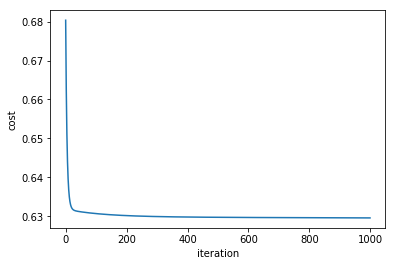

In [203]:
plt.plot(J_hist)
plt.xlabel('iteration')
plt.ylabel('cost')

In [204]:
theta

array([-0.00341503,  0.0103579 ,  0.00056687])

In [205]:
J

0.6295780528865766

In [206]:
def func(theta, X, y):
    return ComputecostLogistic(X, y, theta)

In [207]:
func(theta, X, y)

0.6295780528865766

In [208]:
result = opt.minimize(func, theta, args=(X,y))

In [209]:
result

      fun: 0.20349770159103017
 hess_inv: array([[ 3.20531215e+03, -2.60213562e+01, -2.54454601e+01],
       [-2.60213562e+01,  2.26337250e-01,  1.93253526e-01],
       [-2.54454601e+01,  1.93253526e-01,  2.17091621e-01]])
      jac: array([-5.77419996e-08, -2.71759927e-06, -3.74764204e-06])
  message: 'Optimization terminated successfully.'
     nfev: 110
      nit: 18
     njev: 22
   status: 0
  success: True
        x: array([-25.16123226,   0.20623091,   0.20147075])

In [215]:
func(result.x, X, y)
theta_sol = result.x
theta_sol

array([-25.16123226,   0.20623091,   0.20147075])

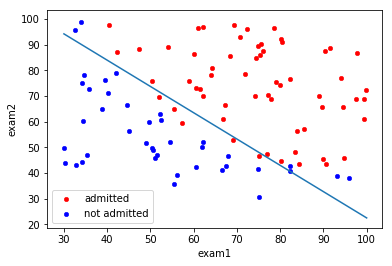

In [219]:
ax = score_admitted.plot(x='exam1', y='exam2', kind='scatter', marker='o', c='red', lw=0.5, label='admitted')
ax.set_xlabel("Exam1")
ax.set_ylabel("Exam2")
score_dropped.plot(x='exam1', y='exam2', kind='scatter', marker='o', c='blue', lw=0.5, label='not admitted', ax=ax)
xplot = np.linspace(30,100,10)
yplot = -1/theta_sol[2]*(theta_sol[0] + theta_sol[1]*xplot)
ax.plot(xplot,yplot)

In [259]:
def predict(theta_sol, X):
    h = Sigmoid(theta_sol.T@X)
    if X.ndim > 1:
        return [1 if hh >= 0.5 else 0 for hh in h]
    else:
        return h

In [266]:
y_predict = np.array(predict(theta_sol, X))

In [267]:
predict(theta_sol, np.array([1,45,85]))

0.7762894913664231

In [268]:
y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [269]:
y_predict

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [276]:
num_matched = np.sum(y_predict == y)

In [279]:
accuracy = num_matched/y.size
accuracy

0.89